### Universidad de Monterrey  
#### División de Ingenierías
#### Lab - Robotics

Lab 2: Drawing shape functions and text on images

Authors: Miguel Benavides Banda, Laura Aguilera



#### Introducción
In this lab we will learn how to draw functions on images. With the following commands containted in the cv2 library, we will draw lines, geometrical figures and text on top of an image:

- cv2.line()
- cv2.rectangle()
- cv2.circle()
- cv2.ellipse()
- cv2.polygon()
- cv2.putText()

#### Procedure
The baSe code is provided by the teacher and after finishing this practice, we must create a Jupyter Notebook report in order to explain the whole process of creating the figures on top of the picture provided by the teacher. This lab consists on two parts, the first one being the basic to explore the code and find out how the methods work, the second part requires a little bit of more expertise and thinking since e have to combine the knowledges learned in the first part:
* Drawing a single shape
* Drawing multiple bounding boxes on an image


#### Drawing a single shape
The following code is the one used for this part of the practice:

In [1]:
""" draw_shapes_on_image.py

    example:

    line:
    python3.5 draw_shapes_on_image.py -i vehicular_traffic.jpg -s line -lp1 615 70 -lp2 695 70 -c 255 0 0 -t 2

    rectangle:
    python3.5 draw_shapes_on_image.py -i vehicular_traffic.jpg -s rectangle -lp1 610 530 -lp2 780 700 -c 0 0 255 -t 2

    circle:
    python3.5 draw_shapes_on_image.py -i vehicular_traffic.jpg -s circle -xy 690 610 -r 100 -c 0 255 0 -t 2

    ellipse:
    python3.5 draw_shapes_on_image.py -i vehicular_traffic.jpg -s ellipse -xy 300 450 -hw 100 50 -rot 45 -ang1 130 -ang2 270 -c 0 0 255 -t 2

    polygon:
    python3.5 draw_shapes_on_image.py -i vehicular_traffic.jpg -s polygon -b True -c 0 255 0 -t 2

    text:
    python3.5 draw_shapes_on_image.py -i vehicular_traffic.jpg -s text -xy 640 530 -txt "Test text" -c 255 0 0 -t 2


    This script draws different geometric shapes on an image.

    This includes:
        - lines
        - rectangles
        - circles
        - ellipses
        - polygons
        - text

    author: Miguel Benavides Banda
    date created: 18-02-2018
    universidad de monterrey.
"""

# import required libraries
import numpy as np
import cv2
import argparse
import matplotlib.pyplot as plt
%matplotlib inline


# ------------------------------------- #
# -------- UTILITY FUNCTIONS ---------- #
# ------------------------------------- #

# define function to draw a line
def draw_a_line(img, p1, p2, colour, thickness, linetype=cv2.LINE_8):

    # draw a line on image
    cv2.line(img, p1, p2, colour, thickness, linetype)

    # return img
    return img


# define function to draw a rectangle
def draw_a_rectangle(img, p1, p2, colour, thickness, linetype=cv2.LINE_8):

    # draw a line on image
    cv2.rectangle(img, p1, p2, colour, thickness, linetype)

    # return img
    return img


# define function to draw a circle
def draw_a_circle(img, xy, radius, colour, thickness):

    # draw a line on image
    cv2.circle(img, xy, radius, colour, thickness)

    # return img
    return img


# define function to draw an ellipse
def draw_an_ellipse(img, xy, hw, rotation, ang1, ang2, colour, thickness):

    # draw a line on image
    cv2.ellipse(img, xy, hw, rotation, ang1, ang2, colour, thickness)

    # return img
    return img

# define function to draw a polygon
def draw_a_polygon(img, array, boolean, colour, thickness):

    # draw a line on image
    cv2.polylines(img, array, boolean, colour, thickness)

    # return img
    return img

# define function to put text
def put_Text(img, text, xy, font, font_size, colour, thickness, linetype=cv2.LINE_8):

    # draw a line on image
    cv2.putText(img, text, xy, font, font_size, colour, thickness, linetype)

    # return img
    return img

# ------------------------------------- #
# ------------- MAIN CODE ------------- #
# ------------------------------------- #

# parse command line arguments
parser = argparse.ArgumentParser('Draw geometric shapes on an image')
parser.add_argument('-i', '--image',
                    help='name of input image', type=str, required=True)
parser.add_argument('-s', '--shape',
                    help='geometric shape to be drawn on the input image', type=str, required=True)
parser.add_argument('-lp1', '--line_p1', nargs='*',
                    help='x,y coordinate of point 1', required=False)
parser.add_argument('-lp2', '--line_p2', nargs='*',
                    help='x,y coordinate of point 2', required=False)
parser.add_argument('-xy', '--coordinate_xy', nargs='*',
                    help='center coordinates (x, y)', required=False)
parser.add_argument('-hw', '--axis_hw', nargs='*',
                    help='length of the minor and major axes (h, w)', required=False)
parser.add_argument('-r', '--radius',
                    help='radius of circle', type=int, required=False)
parser.add_argument('-rot', '--rotation',
                    help='rotation angle of the ellipse (calculated counterclockwise)', type=int, required=False)
parser.add_argument('-ang1', '--start_angle',
                    help='starting angle (calculated clockwise)', type=int, required=False)
parser.add_argument('-ang2', '--final_angle',
                    help='final angle (calculated clockwise)', type=int, required=False)
parser.add_argument('-c', '--colour', nargs='*',
                    help='stroke colour in BGR (not RGB, be careful)', required=False)
parser.add_argument('-t', '--thickness',
                    help='stroke thickness  (in pixels)', type=int, required=False)
parser.add_argument('-b', '--boolean',
                    help='True, if it is a closed line (Polygon)', type=bool, required=False)
parser.add_argument('-a', '--array', nargs='*',
                    help='array of coordinates for polygon', type=list, required=False)
parser.add_argument('-txt', '--text',
                    help='the text to be written', type=str, required=False) 
args = vars(parser.parse_args())

# retrieve name of input image given as argument from command line
img_in_name = args['image']

# read in image from disk
img_in = cv2.imread(img_in_name, cv2.IMREAD_COLOR) # alternatively, you can use cv2.IMREAD_GRAYSCALE

# verify that image exists
if img_in is None:
    print('ERROR: image ', img_in_name, 'could not be read')
    exit()

# retrieve geometric shape name
geometric_shape = args['shape']

# if geometric shape is a line or a rectangle
if (geometric_shape == 'line') or (geometric_shape == 'rectangle'):

    # retrieve line features
    line_p1 = args['line_p1']
    line_p2 = args['line_p2']
    colour = args['colour']
    thickness = args['thickness']

    # if '--line' is specified, but either '--line_p1' or
    # '--line_p2' is missing, ask the user to enter
    # the corresponding coordinate
    if (line_p1 is None) or (line_p2 is None) or (colour is None) or (thickness is None):

        # ask user enter line coordinates
        print('ERROR: line coordinate or info missing')
        exit()

    # otherwise
    else:

        # retrieve line coordinates
        line_p1 = tuple(list(map(int, line_p1)))
        line_p2 = tuple(list(map(int, line_p2)))
        colour = tuple(list(map(int, colour)))

        # check that each coordinate is of length 2
        if len(line_p1) == 2 and len(line_p2)==2 and len(colour)==3:

            # if drawing a line
            if geometric_shape == 'line':

                # call 'draw_a_line'
                img_in = draw_a_line(img_in, line_p1, line_p2, colour, thickness)

            # if drawing a rectangle
            elif geometric_shape == 'rectangle':

                # call 'draw_a_rectangle'
                img_in = draw_a_rectangle(img_in, line_p1, line_p2, colour, thickness)

        # otherwise	
        else:

            # ask the user enter a valid line coordinate
            print('ERROR: both p1 and p2 coordinates must be of length 2 and colour length is 3')
            exit()


# if geometric shape is a circle
if (geometric_shape == 'circle'):

    # retrieve circle features
    coordinate_xy = args['coordinate_xy']
    radius = args['radius']
    colour = args['colour']
    thickness = args['thickness']

    # if '--circle' is specified, but '--coordinate_xy ' is missing,
    # ask the user to enter the corresponding coordinate
    if (coordinate_xy is None) or (radius is None) or (colour is None) or (thickness is None):

        # ask user enter line coordinates
        print('ERROR: x,y coordinates or info missing')
        exit()

    # otherwise
    else:

        # retrieve circle coordinates
        coordinate_xy = tuple(list(map(int, coordinate_xy)))
        colour = tuple(list(map(int, colour)))

        # check that each coordinate is of length 2
        if len(coordinate_xy) == 2 and len(colour)==3:

            img_in = draw_a_circle(img_in, coordinate_xy, radius, colour, thickness)

        # otherwise
        else:

            # ask the user enter a valid line coordinate
            print('ERROR: xy coordinates must be of length 2')
            exit()


# if geometric shape is an ellipse
if (geometric_shape == 'ellipse'):

    # retrieve ellipse features
    coordinate_xy = args['coordinate_xy']
    axis_hw = args['axis_hw']
    rotation = args['rotation']
    start_angle = args['start_angle']
    final_angle = args['final_angle']
    colour = args['colour']
    thickness = args['thickness']

    # if '--ellipse' is specified, but '--coordinate_xy ' is missing,
    # ask the user to enter the corresponding coordinate
    if (coordinate_xy is None) or (axis_hw is None) or (rotation is None) or (start_angle is None) or (final_angle is None) or (colour is None) or (thickness is None):

        # ask user enter line coordinates
        print('ERROR: either x,y coordinates or h,w axis or info are missing')
        exit()

    # otherwise
    else:

        # retrieve ellipse coordinates
        coordinate_xy = tuple(list(map(int, coordinate_xy)))
        axis_hw = tuple(list(map(int, axis_hw)))
        colour = tuple(list(map(int, colour)))

        # check that each coordinate is of length 2
        if len(coordinate_xy) == 2 and len(axis_hw)==2 and len(colour)==3:

            img_in = draw_an_ellipse(img_in, coordinate_xy, axis_hw, rotation, start_angle, final_angle, colour, thickness)

        # otherwise
        else:

            # ask the user enter a valid line coordinate
            print('ERROR: either xy coordinates and hw axis must be of length 2 and color length 3')
            exit()


# if geometric shape is a polygon
if (geometric_shape == 'polygon'):

    # retrieve polygon features
    array = [[1048,180],[1121,220],[1099,314],[995,314],[976,220]]
    boolean = args['boolean']
    colour = args['colour']
    thickness = args['thickness']

    # if '--polygon' is specified, but '--array ' is missing,
    # ask the user to enter the corresponding coordinate
    if (array is None) or (boolean is None) or (colour is None) or (thickness is None):

        # ask user enter line coordinates
        print('ERROR: either array coordinates or  info are missing')
        exit()

    # otherwise
    else:

        # retrieve polygon coordinates
        vrx = np.array([array], np.int32)
        vrx = vrx.reshape((-1,1,2))
        colour = tuple(list(map(int, colour)))

        # check that each coordinate is of length 2
        if len(colour)==3:

            img_in = draw_a_polygon(img_in, [vrx], boolean, colour, thickness)

        # otherwise
        else:

            # ask the user enter a valid array coordinate
            print('ERROR: array coordinates must be of length 5 and color length 3')
            exit()


# if put text is selected
if (geometric_shape == 'text'):

    # retrieve polygon features
    text = args['text']
    xy = args['coordinate_xy']
    colour = args['colour']
    thickness = args['thickness']
    font=cv2.FONT_HERSHEY_SIMPLEX
    font_size=0.8

    # if '--polygon' is specified, but '--array ' is missing,
    # ask the user to enter the corresponding coordinate
    if (text is None) or (xy is None) or (colour is None) or (thickness is None):

        # ask user enter line coordinates
        print('ERROR: either xy coordinates or  info are missing')
        exit()

    # otherwise
    else:

        # retrieve polygon coordinates
        xy = tuple(list(map(int, xy)))
        colour = tuple(list(map(int, colour)))

        # check that each coordinate is of length 2
        if len(xy)==2 and len(colour)==3:

            img_in = put_Text(img_in, text, xy, font, font_size, colour, thickness)

        # otherwise
        else:

            # ask the user enter a valid array coordinate
            print('ERROR: xy coordinates must be of length 2 and color length 3')
            exit()

plt.imshow(img_in)
plt.show()

# create a new window for image purposes
#cv2.namedWindow("input image", cv2.WINDOW_AUTOSIZE)  # alternatively, you can use cv2.WINDOW_NORMAL

# visualise input and output image
#cv2.imshow("input image", img_in)

# wait for the user to press a key
#key = cv2.waitKey(0)

# destroy windows to free memory
#cv2.destroyAllWindows()
#print('windows have been closed properly')
#exit()

usage: Draw geometric shapes on an image [-h] -i IMAGE -s SHAPE
                                         [-lp1 [LINE_P1 [LINE_P1 ...]]]
                                         [-lp2 [LINE_P2 [LINE_P2 ...]]]
                                         [-xy [COORDINATE_XY [COORDINATE_XY ...]]]
                                         [-hw [AXIS_HW [AXIS_HW ...]]]
                                         [-r RADIUS] [-rot ROTATION]
                                         [-ang1 START_ANGLE]
                                         [-ang2 FINAL_ANGLE]
                                         [-c [COLOUR [COLOUR ...]]]
                                         [-t THICKNESS] [-b BOOLEAN]
                                         [-a [ARRAY [ARRAY ...]]] [-txt TEXT]
Draw geometric shapes on an image: error: the following arguments are required: -i/--image, -s/--shape


SystemExit: 2

/home/andreshernandez/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


#### Drawing multiple bounding boxes on an image
In this part of the lab, we will draw multiple boxes on top of an image. With help from the *raw_boxes()* command, we will be able to create a rectangle according to the coordinates of the picture that we will to insert. 

drawing rectangle:  (610, 530) , (780, 700) , (255, 0, 0) , 2
drawing rectangle:  (830, 410) , (955, 520) , (0, 255, 0) , 2
drawing rectangle:  (680, 210) , (750, 290) , (255, 0, 255) , 2
drawing rectangle:  (580, 240) , (655, 310) , (0, 255, 255) , 2
drawing rectangle:  (280, 230) , (350, 300) , (255, 255, 0) , 2
drawing rectangle:  (200, 190) , (270, 250) , (0, 0, 255) , 2
drawing rectangle:  (10, 170) , (80, 230) , (255, 255, 255) , 2
drawing rectangle:  (575, 135) , (620, 180) , (0, 0, 0) , 2


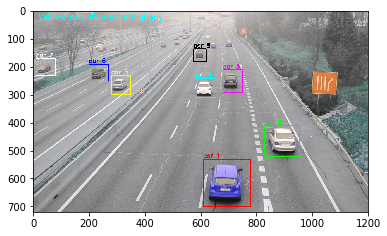

In [1]:
""" draw_bounding_boxes.py

    Dibuja multiples cajas en una imagen.

    author: Miguel Benavides Banda
    date created: 19-02-2018
    universidad de monterrey.
"""

# import required libraries
import numpy as np
import cv2
import argparse
import matplotlib.pyplot as plt
%matplotlib inline


# ------------------------------------- #
# -------- UTILITY FUNCTIONS ---------- #
# ------------------------------------- #

# draw bounding boxes on image
def draw_bboxes(img, bbox):

    # loop through bounding boxes
    i=1
    for bbox in list_of_bounding_boxes:

        # retrieve features of a given rectangle
        p1 = tuple(bbox[0])
        p2 = tuple(bbox[1])
        colour = tuple(bbox[2])
        thickness = bbox[3]

        # draw a line on image
        cv2.rectangle(img, p1, p2, colour, thickness, cv2.LINE_8)

        # draw text
        ttext='car '+str(i)
        ttext_type=cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, ttext, (p1[0], p1[1]-5), ttext_type, 0.7, colour, thickness, cv2.LINE_8)

        i=i+1

        # draw a line on image
        print('drawing rectangle: ', tuple(bbox[0]), ',',
                                     tuple(bbox[1]), ',',
                                     tuple(bbox[2]), ',',
                                     bbox[3])
    # return img
    return img


# draw text on image
def draw_frame_description(img, ttext):

    # add text to image
    cv2.putText(img, ttext, (20,30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 255), 2, cv2.LINE_8)

    return img



# ------------------------------------- #
# ------------- MAIN CODE ------------- #
# ------------------------------------- #

####### ADD MORE BOUNDING BOXES HERE #######
# list of bounding boxes
list_of_bounding_boxes = [[[610, 530], [780, 700], [255, 0, 0], 2],
                          [[830, 410], [955, 520], [0, 255, 0], 2],
                          [[680, 210], [750, 290], [255, 0, 255], 2],
                          [[580, 240], [655, 310], [0, 255, 255], 2],
                          [[280, 230], [350, 300], [255, 255, 0], 2],
                          [[200, 190], [270, 250], [0, 0, 255], 2],
                          [[10, 170], [80, 230], [255, 255, 255], 2],
                          [[575, 135], [620, 180], [0, 0, 0], 2]]
####### ---------------------------- #######

# read in image from disk
img_name = 'vehicular_traffic.jpg'
img = cv2.imread(img_name, cv2.IMREAD_COLOR) # alternatively, you can use cv2.IMREAD_GRAYSCALE

# verify that image exists
if img is None:
    print('ERROR: image ', img_name, 'could not be read')
    exit()

# draw list of bounding boxes on image
img = draw_bboxes(img, list_of_bounding_boxes)

# draw text on image
img = draw_frame_description(img, 'Vehicle detection on a highway')

plt.imshow(img)
plt.show()

# create a new window for image purposes
#cv2.namedWindow("input image", cv2.WINDOW_AUTOSIZE)  # alternatively, you can use cv2.WINDOW_NORMAL

# visualise input and output image
#cv2.imshow("input image", img)

# wait for the user to press a key
#key = cv2.waitKey(0)

# destroy windows to free memory
#cv2.destroyAllWindows()
#print('windows have been closed properly')
#exit()

**NB. Note that in the above code the matplotlib library was used for image visualisation purposes instead of cv2.imshow()**.

### Conclusions
We consider that this lab was challenging, but it was very interesting too. We think that adding the right coordinates to the picture to place the lines will be the trickiest part, specially when we do it with video files because we will have to find the right frame and picture coordinates with several moving images. We consider that this lab was a great base for learning image processing with geometric figures and I'm sure these knowledges will be very useful in the future in order to understand video processing better.

### Review

- Obs 1  

    $ python3.5 draw_shapes_on_image.py -i vehicular_traffic.jpg -s rectangle -lp1 610 530 -lp2 780 700 -c 0 0  -t 5

    ERROR: both p1 and p2 **coordinates** must be of length 2 and colour length is 3

    Above, the error message should refer the user to the length of colour list, which should be -c 0 0 255 instead of -c 0 0 
    
    
    
- Obs 2

    python3.5 draw_shapes_on_image.py -i vehicular_traffic.jpg -s polygon -b True -c 0 255 0 -t 2
Traceback (most recent call last):
  File "draw_shapes_on_image.py", line 296, in <module>
    if (array is None) or (boolean is None) or (colour is None) or (thickness is None):
NameError: name 'array' is not defined

    Fix this adding the code that we wrote in class today.


- Obs 3: Why did you decide to use matplotlib instead the OpenCV method cv2.imshow() for image visualisation?


Nice work!, how you guys enjoyed this lab. It may seem a bit basic at first glance, but what you both just learnt here will be quite useful in the upcoming labs. 

Tue 27 Feb 2018